#### IMDB, Rotten Tomatoes, Fandango Or Metacritic?
There are websites come up with movie ratings with their own movie ratings.The most popular websites are 1) IMDB, 2) 3)Fandango, 4)otten Tomatoes, and 5) Metacritic. Here i am using the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating

Reference:Alex Olteanu
Data: fandango_score_comparison.csv(using the Walt Hickey's data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.)
Data: One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on GitHub

In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
previous.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [3]:
after.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [4]:
Ratings_2015=previous.copy()


In [5]:
Ratings_2015['Year'] = Ratings_2015['FILM'].str[-5:-1]

In [6]:
Ratings_2016=after.copy()

In [7]:
Ratings_2015['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [8]:
Ratings_2015 = Ratings_2015[Ratings_2015['Year']=='2015'].copy()
Ratings_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [9]:
Ratings_2016['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
Ratings_2015.head(20)
Ratings_2015.shape

(129, 23)

In [12]:
Ratings_2016.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


#### Visualizing Frequency Distributions


Text(50, -3.65, 'Tomatometer\n (0-100%)')

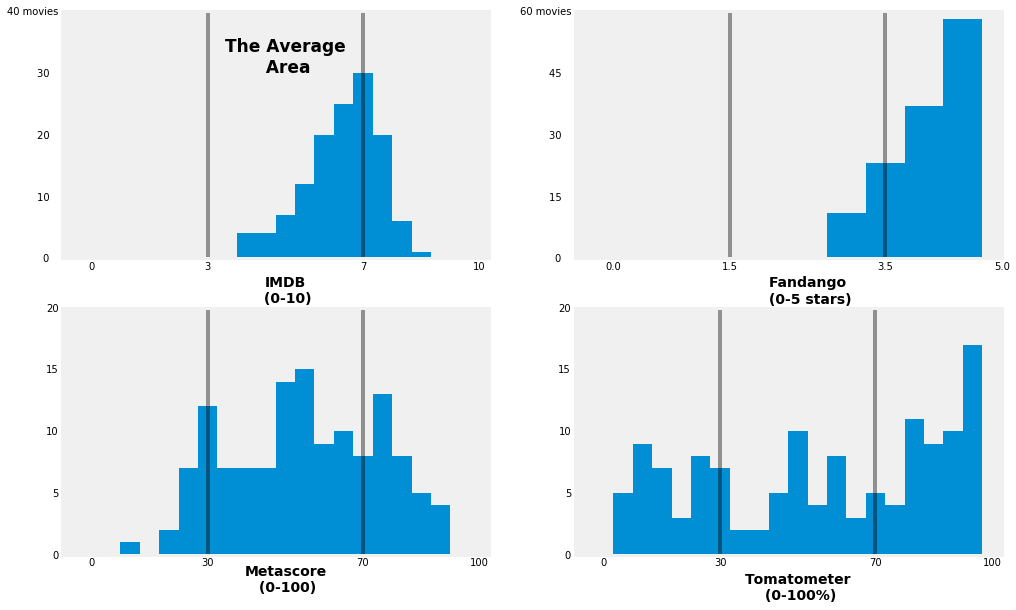

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from numpy import arange
%matplotlib inline

# Generate a figure with 4 axes (2 rows by 2 columns)
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# Remove grids for all axes
for ax in fig.axes:
    ax.grid(False)

## IMDB
#bins range is.5
ax1.hist(Ratings_2015.IMDB,bins = 20, range = (0,10), align = 'left')
ax1.axvline(3, color = 'black', alpha = 0.4)
ax1.axvline(7, color = 'black', alpha = 0.4)
ax1.set_ylim(0, 40)
ax1.text(5,30, 'The Average\n Area', fontsize = 17, weight = 'bold', ha = 'center')
ax1.set_yticks([0,10,20,30,40])
ax1.set_xticks([0,3,7,10])
ax1.set_yticklabels(labels =['0   ','10   ','20   ','30   ','40 movies'])   
ax1.text(5,-7.2, 'IMDB\n (0-10)', fontsize = 14, weight = 'bold', ha = 'center')
#ax1.text(-0.86,39.2, 'movies', fontsize = 11) 

# Fandango
ax2.hist(Ratings_2015.Fandango_Stars, bins=10, range=(0,5), align='left')
ax2.axvline(1.5, color='black',alpha=0.4)
ax2.axvline(3.5, color='black',alpha=0.4)
ax2.set_ylim(0,60)
ax2.set_yticks([0,15,30,45,60])
ax2.set_xticks([0,1.5,3.5,5])
ax2.text(2.5,-11, 'Fandango\n (0-5 stars)', weight='bold', fontsize=14, ha='center')
ax2.set_yticklabels(labels =['0   ','15   ','30   ','45   ','60 movies'])  

# Metacritic
ax3.hist(Ratings_2015.Metacritic,bins=20, range=(0,100),align='left')
#bin range = 5 (equivalent to 0.5 if normalized to 0-10)
ax3.axvline(30, color='black', alpha=0.4)
ax3.axvline(70, color='black', alpha=0.4)
ax3.set_ylim(0,20)
ax3.set_yticks([0,5,10,15,20])
ax3.set_xticks([0,30,70,100])
ax3.text(50,-3,'Metascore\n (0-100)', fontsize = 14, weight = 'bold', ha = 'center')

# RT
ax4.hist(Ratings_2015.RottenTomatoes, bins = 20, range = (0,100), align = 'left') # bin range = 5 
ax4.axvline(30, color = 'black', alpha = 0.4)
ax4.axvline(70, color = 'black', alpha = 0.4)
ax4.set_ylim(0,20)
ax4.set_yticks([0,5,10,15,20])
ax4.set_xticks([0,30,70,100])
ax4.text(50,-3.65, 'Tomatometer\n (0-100%)', fontsize = 14, weight = 'bold', ha = 'center')


From the above , The Metascore's histogram resembles a normal distribution. it has a thick cluster in the average area,the bar on the each of the other two areas, which decrease in height towards extremes, less gradually.All these clearly indicate that most of the metascores have an average value, The bulk of the distribution is in the average area as well, but there is an obvious skew towards the highest average values. The high ratings area looks similar to what would be expected to be seen for a normal distribution in that part of the histogram. However, the striking feature is that the area representing low movie ratings is completely empty. In IMDB, the bulk of the distribution is in the average area but there is an obvious skew towards the highest average values. The high rating area looks similar to be seen for a normal distribution in that part of the histogram.The area representing low movie ratings is completely empty.

### Fandango_comparison


In [52]:
Rating_2015 = previous.copy()
Rating_2015.head()
Rating_2015.shape

(146, 22)

In [51]:
Rating_2016=after.copy()
Rating_2016.head()
Rating_2016.shape

(214, 15)

Generating a frequency distribution tablefor 2015 and 2016 data

In [53]:
## calculate frequencies
fan_old= Rating_2015.Fandango_Stars.value_counts(normalize=True).sort_index()*100
fan_mt = Rating_2015.Metacritic_norm_round.value_counts(normalize=True).sort_index()*100
fan_imdb=Rating_2015.IMDB_norm_round.value_counts(normalize=True).sort_index()*100
fan_rt= Rating_2015.RT_user_norm_round.value_counts(normalize=True).sort_index()*100

In [55]:
## calculate frequencies
New_fan= Rating_2016.fandango.value_counts(normalize=True).sort_index()*100
New_mt=  Rating_2016.nr_metascore.value_counts(normalize=True).sort_index()*100
New_RT = Rating_2016.nr_tmeter.value_counts(normalize=True).sort_index()*100
New_Imdb = Rating_2016.nr_imdb.value_counts(normalize=True).sort_index()*100

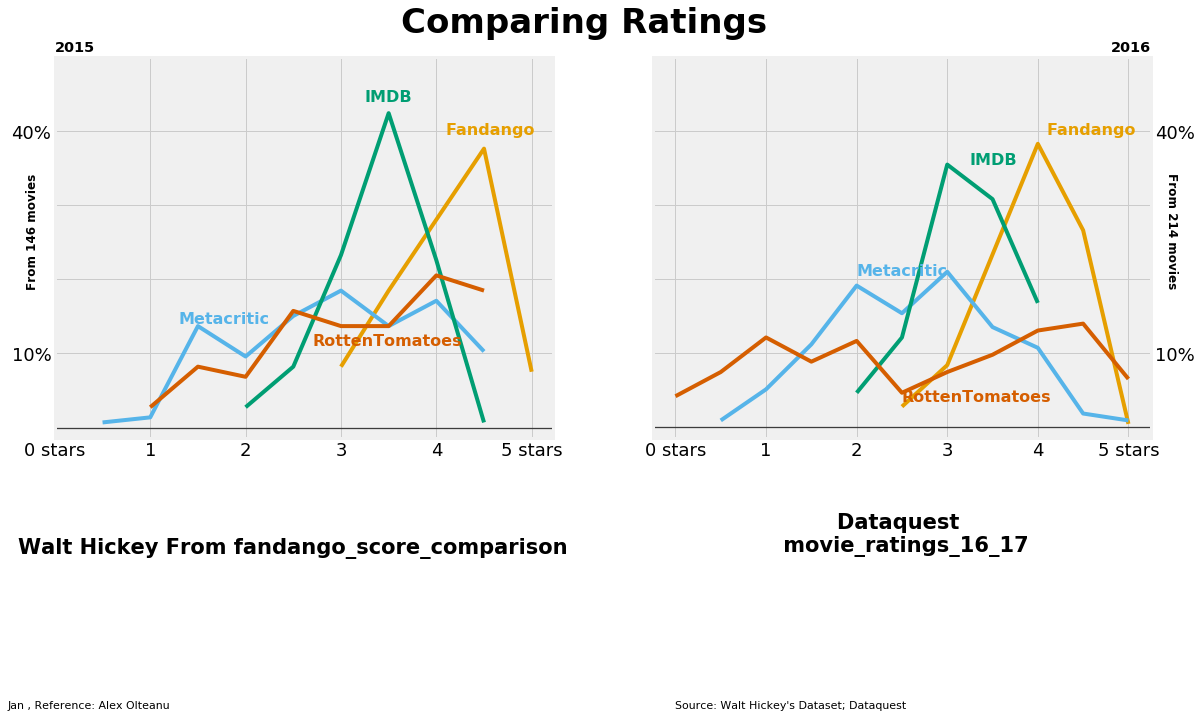

In [107]:
### Generate a figure with 2 axes (1 row by 2 columns)
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

fig = plt.figure(figsize=(17.5, 7))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

#previous_data
ax1.plot(fan_old.index, fan_old.values, color=colors[1])
ax1.plot(fan_mt.index,fan_mt.values, color=colors[2])
ax1.plot(fan_imdb.index, fan_imdb.values, color=colors[3])
ax1.plot(fan_rt.index, fan_rt.values, color=colors[4])

#New_data
ax2.plot(New_fan.index, New_fan.values, color=colors[1])
ax2.plot(New_mt.index, New_mt.values, color=colors[2])
ax2.plot(New_Imdb.index, New_Imdb.values, color=colors[3])
ax2.plot(New_RT.index, New_RT.values, color=colors[4])

# Tweak the axes
# Ax1
# Ticks
ax1.set_yticks([0,10,20,30,40,50])
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_yticklabels(['', '10%', '', '', '40%', ''])
ax1.set_xticklabels(['0 stars', '1', '2', '3', '4', '5 stars', ])
ax1.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax1.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
## Legend
ax1.text(3.25, 44, "IMDB", color=colors[3],fontsize = 16, weight = 'bold')
ax1.text(4.1,39.5, 'Fandango', color = (230/255, 159/255, 0), fontsize = 16, weight = 'bold')
ax1.text(1.3,14, "Metacritic",color=colors[2],fontsize=16,weight='bold')
ax1.text(2.7, 11, 'RottenTomatoes', color=colors[4],fontsize=16,weight='bold')
ax1.text(-0.3, 33, 'From 146 movies', fontsize = 12, weight = 'bold', rotation = 'vertical')
# Ax2
# Ticksb
ax2.yaxis.tick_right()# moves the y-axis to the right
ax2.set_yticks([0,10,20,30,40,50])
ax2.set_xticks([0,1,2,3,4,5])
ax2.set_yticklabels(['', '10%', '', '', '40%', ''])
ax2.set_xticklabels(['0 stars', '1', '2', '3', '4', '5 stars', ])
ax2.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax2.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
## Legend
ax2.text(2.5,3.5,"RottenTomatoes",color=colors[4],fontsize=16,weight='bold')
ax2.text(2,20.5,"Metacritic",color=colors[2],fontsize=16,weight='bold')
ax2.text(3.25, 35.5, "IMDB", color=colors[3],fontsize = 16, weight = 'bold')
ax2.text(4.1,39.5, 'Fandango', color = colors[1], fontsize = 16, weight = 'bold')
ax2.text(5.4, 33, 'From 214 movies', fontsize = 12, weight = 'bold', rotation =270)
# Titles & Subtitles
fig.suptitle("Comparing Ratings",fontsize = 34, weight = 'bold')
ax1.set_title('2015', loc = 'left', weight = 'bold')
ax2.set_title('2016', loc = 'right', weight = 'bold')
ax1.text(2.5, -17, 'Walt Hickey From fandango_score_comparison', fontsize = 21, 
         weight = 'bold', ha = 'center')
ax2.text(2.5, -17, 'Dataquest \n movie_ratings_16_17', fontsize = 21, 
         weight = 'bold', ha = 'center')
ax1.text(-0.5, -38, 'Jan , Reference: Alex Olteanu', fontsize = 11)
ax2.text(0, -38, 'Source: Walt Hickey\'s Dataset; Dataquest', 
         fontsize = 11)


plt.show()
fig.savefig('small_multiple_fdg.jpg')